In [1]:
%tensorflow_version 1.x
import tensorflow
print(tensorflow.__version__)

TensorFlow 1.x selected.
1.15.2


# 데이터 준비

In [2]:
from sklearn.datasets import make_moons
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from matplotlib import pyplot
from pandas import DataFrame


In [3]:
def create_data_with_total_size(total_size=100, train_ratio=0.8):
  x, y = make_moons(n_samples=total_size, noise=0.2, random_state=1)

  df = DataFrame(dict(x=x[:,0], y=x[:,1], label=y))
  colors = {0:'red', 1:'blue'}
  fig, ax = pyplot.subplots()
  grouped = df.groupby('label')
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  pyplot.show()

  split_index = int(x.shape[0]*train_ratio)
  train_x, test_x = x[:split_index], x[split_index:]
  train_y, test_y = y[:split_index], y[split_index:]

  return (train_x, train_y), (test_x, test_y)


# 데이터 갯수와 오버피팅

In [ ]:
def show_overfitting(total_data_count, train_ratio):

  (train_x, train_y), (test_x, test_y) = create_data_with_total_size(total_data_count, train_ratio)

  model = Sequential()
  model.add(Dense(500, input_shape=(2,), activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=2000, verbose=0, batch_size=64)

  pyplot.plot(history.history['loss'], label='train_loss')
  pyplot.plot(history.history['val_loss'], label='test_loss')
  pyplot.legend()
  pyplot.show()

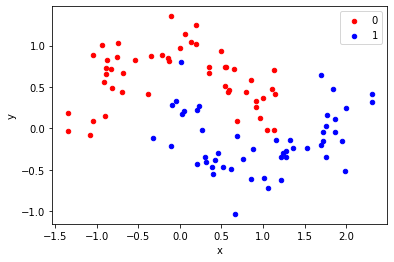

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


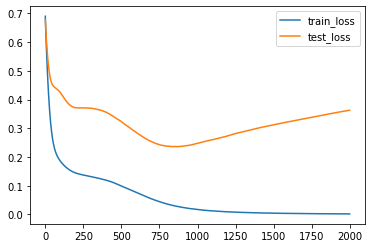

In [4]:
show_overfitting(total_data_count=100, train_ratio=0.3)

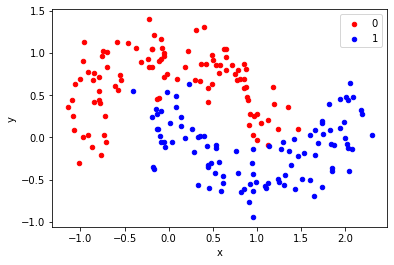

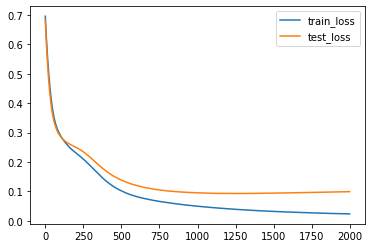

In [5]:
show_overfitting(total_data_count=200, train_ratio=0.3)

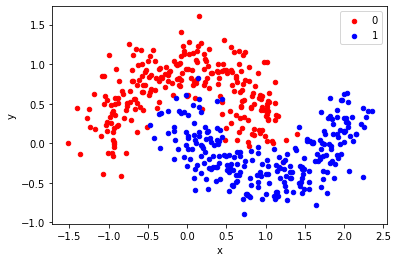

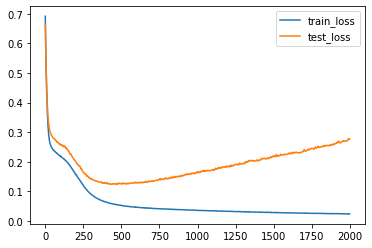

In [6]:
show_overfitting(total_data_count=500, train_ratio=0.3)

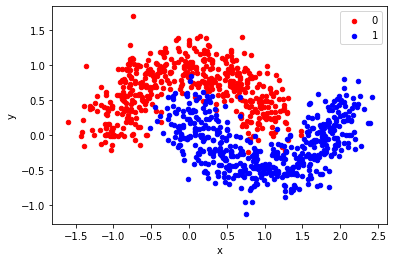

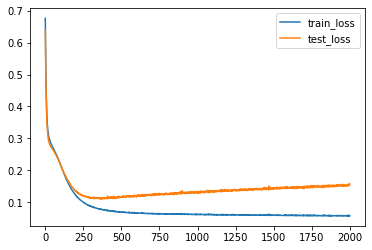

In [7]:
show_overfitting(total_data_count=1000, train_ratio=0.3)

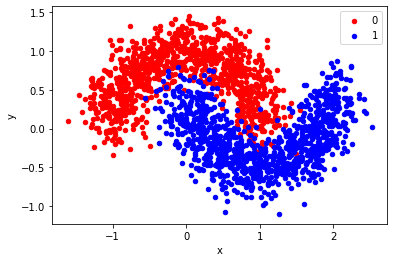

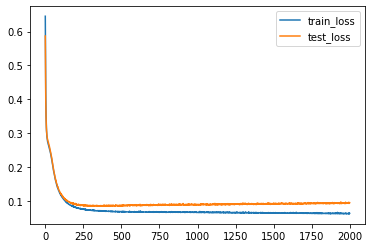

In [14]:
show_overfitting(total_data_count=2000, train_ratio=0.3)

# 데이터 비율과 오버피팅

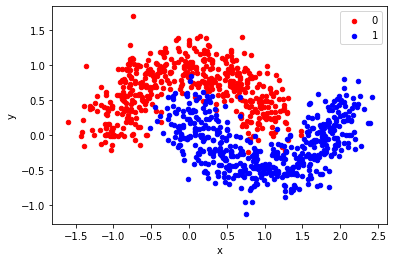

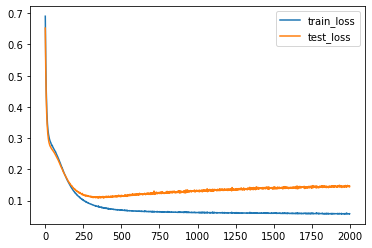

In [8]:
show_overfitting(total_data_count=1000, train_ratio=0.3)

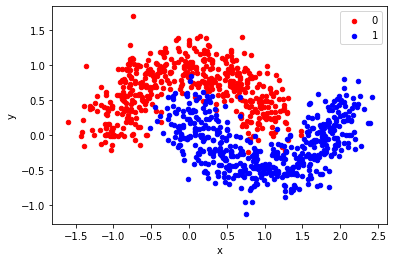

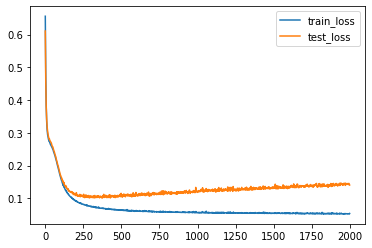

In [9]:
show_overfitting(total_data_count=1000, train_ratio=0.4)

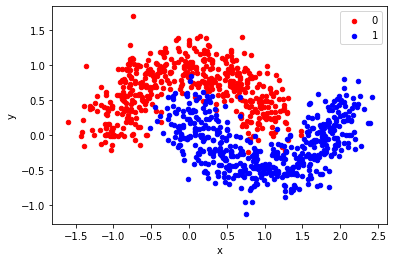

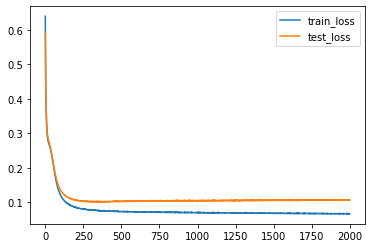

In [10]:
show_overfitting(total_data_count=1000, train_ratio=0.5)

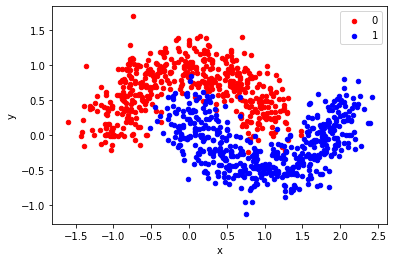

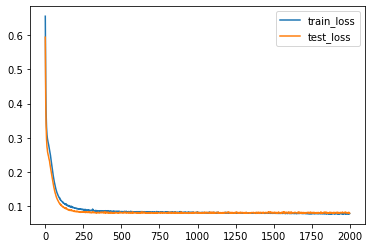

In [11]:
show_overfitting(total_data_count=1000, train_ratio=0.6)

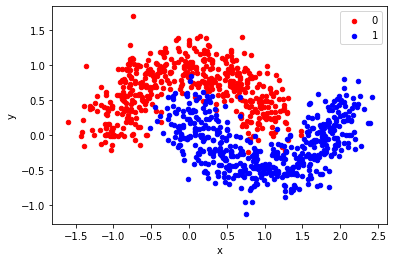

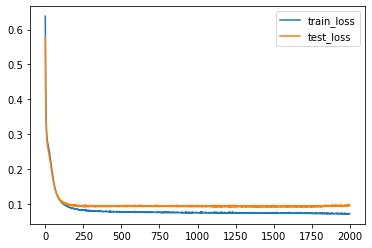

In [12]:
show_overfitting(total_data_count=1000, train_ratio=0.7)

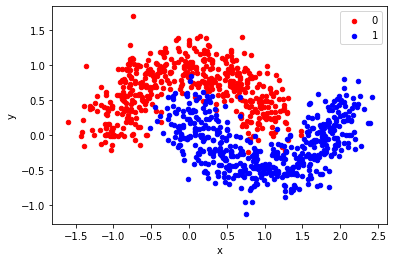

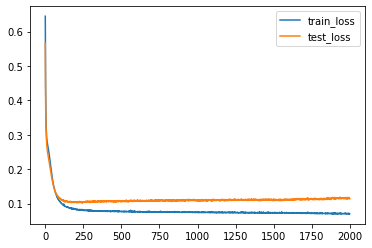

In [13]:
show_overfitting(total_data_count=1000, train_ratio=0.8)